## Nationwide Home Values
#### Abby Hildebrandt Summer 2023

Prompt: 

I want to showcase some of my python skills for my portfolio by making a robust data analysis jupyter notebook using python. I am equipped with a county dataset, which contains zip and fips codes for every county in the United States as well as the geometry of the county. I also have a kaggle dataset of zillow housing price data that shows median rental of different bedroom number units, zillow home value index, and various other housing data, all separated by city name. provide me with 10 prompts of ways I could utilize python in different data visualizations and data science methodologies using this data.

ChatGPT Response: 
1. Geospatial Analysis of Housing Prices: Create choropleth maps using the county geometry data and overlay the Zillow housing price data to visualize the median rental or home value index across different counties in the United States.

2. Trends in Housing Prices over Time: Generate time series plots to visualize the trends in median rental or home value index for specific cities or counties over the years.

3. Correlation Analysis: Perform correlation analysis between housing prices and other variables in the Zillow dataset (e.g., population, unemployment rate) to identify potential relationships.

4. Top Performing Cities/Counties: Identify the top 10 cities or counties with the highest and lowest housing prices (rental or home value index) and create bar plots to compare them.

5. Housing Price Distribution: Create histograms or box plots to visualize the distribution of housing prices (rental or home value index) for different cities or counties.

6. Heatmaps of Housing Price Clusters: Use clustering algorithms (e.g., K-means) to group similar cities or counties based on housing prices and create heatmaps to visualize the clustering results.

7. Interactive Data Dashboard: Develop an interactive dashboard using libraries like Dash or Panel to allow users to explore and filter the housing price data based on various criteria (e.g., city, county, bedroom number, etc.).

8. Time Series Forecasting: Use time series forecasting models (e.g., ARIMA, Prophet) to predict future housing prices for specific cities or counties and visualize the forecasts.

9. Spatial Autocorrelation Analysis: Apply spatial autocorrelation techniques (e.g., Moran's I) to detect spatial patterns in housing prices and visualize the results on a map.

10. Comparative Analysis of Cities/Counties: Compare the housing prices of different cities or counties using side-by-side bar plots or box plots to identify any significant differences.

Important Links: 

https://www.zillow.com/research/data/

### Import Libraries

In [58]:
import pandas as pd
import geopandas as gpd
import psycopg2 as psy
import geotable
from kml2geojson import convert
import itertools
import json
from census import Census
from us import states
import plotly.express as px
import matplotlib.pyplot as plt

#### Read in Zip Code Data

Source: https://www.kaggle.com/datasets/danofer/zipcodes-county-fips-crosswalk?resource=download

In [2]:
b = pd.read_csv("data/ZIP-COUNTY-FIPS_2017-06.csv", dtype=str)
b = b.rename({"ZIP":"zip", "STCOUNTYFP":"fips"}, axis='columns')
b

,zip,COUNTYNAME,STATE,fips,CLASSFP
0,36003,Autauga County,AL,01001,H1
1,36006,Autauga County,AL,01001,H1
2,36067,Autauga County,AL,01001,H1
3,36066,Autauga County,AL,01001,H1
4,36703,Autauga County,AL,01001,H1
...,...,...,...,...,...
52884,00850,St. Croix Island,VI,78010,H4
52885,00840,St. Croix Island,VI,78010,H4
52886,00820,St. Croix Island,VI,78010,H4
52887,00830,St. John Island,VI,78020,H4


#### Read in geometry data

In [3]:
c = gpd.read_file("data/usacounties.geojson", dtype=str)
c = c.rename({"FIPS":"fips"}, axis='columns')
c


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,fips,geometry
0,Lake of the Woods,Minnesota,27,077,27077,"MULTIPOLYGON (((-95.34283 48.54668, -95.34105 ..."
1,Ferry,Washington,53,019,53019,"MULTIPOLYGON (((-118.85163 47.94956, -118.8484..."
2,Stevens,Washington,53,065,53065,"MULTIPOLYGON (((-117.43883 48.04412, -117.5421..."
3,Okanogan,Washington,53,047,53047,"MULTIPOLYGON (((-118.97209 47.93915, -118.9740..."
4,Pend Oreille,Washington,53,051,53051,"MULTIPOLYGON (((-117.43858 48.99992, -117.0320..."
...,...,...,...,...,...,...
3136,Skagway-Hoonah-Angoon,Alaska,02,232,02232,"MULTIPOLYGON (((-137.80952 58.71648, -137.4674..."
3137,Yukon-Koyukuk,Alaska,02,290,02290,"MULTIPOLYGON (((-161.04770 62.20469, -160.9942..."
3138,Southeast Fairbanks,Alaska,02,240,02240,"MULTIPOLYGON (((-146.96382 63.46070, -146.9573..."
3139,Denali,Alaska,02,068,02068,"MULTIPOLYGON (((-152.98947 62.74900, -152.4877..."


---

#### Merge Zip, FIPS, & Geometry 

---

In [4]:
# Group DataFrame A by 'fips' and create a list of zip codes for each group
zip_codes = b.groupby('fips')['zip'].apply(list)

# Merge the zip_codes Series with DataFrame B on 'fips'
c = c.merge(zip_codes, on='fips')

# Rename the new column to 'zip_codes'
c = c.rename(columns={'zip_code': 'zip_codes'})
c

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,fips,geometry,zip
0,Lake of the Woods,Minnesota,27,077,27077,"MULTIPOLYGON (((-95.34283 48.54668, -95.34105 ...","[56686, 56711, 56623, 56741, 56673]"
1,Ferry,Washington,53,019,53019,"MULTIPOLYGON (((-118.85163 47.94956, -118.8484...","[99138, 99140, 99146, 99107, 99118, 99160, 991..."
2,Stevens,Washington,53,065,53065,"MULTIPOLYGON (((-117.43883 48.04412, -117.5421...","[99013, 99148, 99026, 99126, 99040, 99006, 991..."
3,Okanogan,Washington,53,047,53047,"MULTIPOLYGON (((-118.97209 47.93915, -118.9740...","[98846, 98829, 99116, 98813, 98833, 98819, 988..."
4,Pend Oreille,Washington,53,051,53051,"MULTIPOLYGON (((-117.43858 48.99992, -117.0320...","[99139, 99180, 99152, 99006, 99119, 99156, 990..."
...,...,...,...,...,...,...,...
3131,Yakutat,Alaska,02,282,02282,"MULTIPOLYGON (((-142.19485 60.02709, -142.1832...",[99689]
3132,Yukon-Koyukuk,Alaska,02,290,02290,"MULTIPOLYGON (((-161.04770 62.20469, -160.9942...","[99757, 99758, 99733, 99740, 99768, 99724, 996..."
3133,Southeast Fairbanks,Alaska,02,240,02240,"MULTIPOLYGON (((-146.96382 63.46070, -146.9573...","[99764, 99738, 99776, 99731, 99780, 99732, 99737]"
3134,Denali,Alaska,02,068,02068,"MULTIPOLYGON (((-152.98947 62.74900, -152.4877...","[99729, 99744, 99743, 99755]"


Rental Costs Time Series by State

In [59]:
a = pd.read_csv("data/State_MedianRentalPrice_AllHomes.csv")
a = a.astype(str)
a = a.drop(columns = ['SizeRank', 'Unnamed: 0'])
a

,RegionName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,California,nan,nan,2400.0,2400.0,2400.0,2495.0,2500.0,2595.0,2497.0,...,2750.0,2800,2800.0,2800.0,2800.0,2850,2800.0,2800.0,2800.0,2800.0
1,Texas,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1550.0,1575,1595.0,1595.0,1600.0,1595,1590.0,1550.0,1550.0,1550.0
2,New York,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3200.0,3495,3299.0,3295.0,3200.0,3395,3250.0,2950.0,3000.0,3200.0
3,Florida,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1850.0,1850,1850.0,1845.0,1800.0,1800,1800.0,1800.0,1795.0,1790.0
4,Illinois,1575.0,1500.0,1500.0,1500.0,1500.0,1500.0,1550.0,1520.0,1500.0,...,1600.0,1600,1600.0,1642.5,1647.0,1650,1625.0,1600.0,1595.0,1590.0
5,Pennsylvania,nan,1400.0,1400.0,1400.0,1437.5,1475.0,1400.0,1450.0,1425.0,...,1395.0,1400,1400.0,1400.0,1400.0,1400,1375.0,1350.0,1355.0,1350.0
6,Ohio,nan,nan,nan,1200.0,1200.0,1200.0,1200.0,1250.0,1100.0,...,1100.0,1100,1100.0,1100.0,1100.0,1100,1100.0,1100.0,1095.0,1095.0
7,Michigan,nan,1150.0,1200.0,1200.0,1200.0,1250.0,1200.0,1200.0,1200.0,...,1150.0,1200,1200.0,1200.0,1200.0,1200,1200.0,1200.0,1200.0,1150.0
8,Georgia,1037.5,1150.0,1195.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,...,1400.0,1435,1455.0,1480.0,1475.0,1450,1450.0,1445.0,1445.0,1445.0
9,North Carolina,nan,1000.0,997.0,1025.0,1100.0,1100.0,1100.0,1150.0,1150.0,...,1350.0,1400,1400.0,1400.0,1400.0,1400,1399.0,1395.0,1395.0,1395.0


In [62]:
# Melt the DataFrame to convert the integer columns to rows
melted_df = pd.melt(a, id_vars=["RegionName"], var_name="value_name", value_name="value")


In [63]:
# Pivot the DataFrame to make state names as columns and the values as rows
pivoted_df = melted_df.pivot(index="value_name", columns="RegionName", values="value")


In [64]:
pivoted_df

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Virginia,Washington,West Virginia,Wisconsin,Wyoming
value_name,,,,,,,,,,,,,,,,,,,,,
2010-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,1200.0,nan,nan,nan
2010-02,nan,nan,nan,900.0,nan,nan,1700.0,nan,2275.0,nan,...,nan,nan,nan,nan,nan,1350.0,1200.0,nan,nan,nan
2010-03,nan,nan,1400.0,900.0,2400.0,nan,1800.0,nan,1972.5,nan,...,1100.0,nan,1150.0,nan,nan,1300.0,1350.0,nan,nan,nan
2010-04,nan,nan,1377.5,850.0,2400.0,nan,1900.0,nan,1999.0,nan,...,1200.0,nan,1200.0,nan,nan,1350.0,1350.0,nan,nan,nan
2010-05,1095.0,nan,1300.0,850.0,2400.0,nan,1850.0,nan,2000.0,nan,...,1200.0,nan,1300.0,nan,nan,1400.0,1395.0,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,1050,1695,1550,1100,2850,1995,1800,1425,2700,1800,...,1395,1150,1395,1595,1591,1750,2100,1000,1200,1250
2019-09,1045.0,1650.0,1545.0,1050.0,2800.0,2000.0,1800.0,1450.0,2700.0,1800.0,...,1350.0,1125.0,1375.0,1590.0,1575.0,1745.0,2000.0,975.0,1200.0,1200.0
2019-10,1050.0,1650.0,1495.0,1050.0,2800.0,2000.0,1800.0,1450.0,2700.0,1800.0,...,1342.5,1137.5,1350.0,1550.0,1525.0,1700.0,1995.0,990.0,1200.0,1150.0


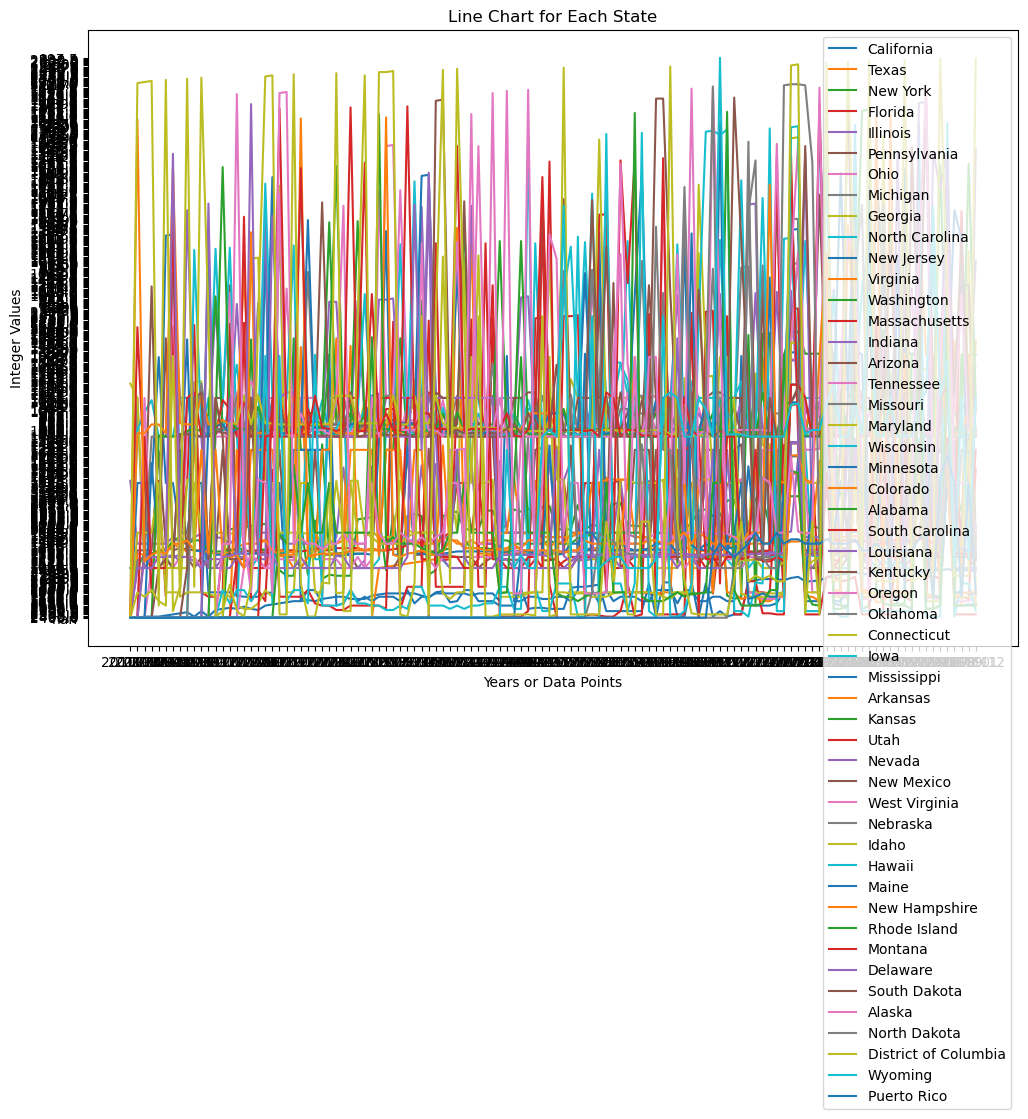

In [61]:
plt.figure(figsize=(12, 8))
for state in a["RegionName"]:
    plt.plot(a.columns[1:], a.loc[a["RegionName"] == state].iloc[:, 1:].values[0], label=state)

plt.xlabel("Years or Data Points")
plt.ylabel("Integer Values")
plt.title("Line Chart for Each State")
plt.legend(loc="upper right")

plt.show()